## Part 2 (a)

In [3]:
import numpy as np
import matplotlib.pyplot as plt

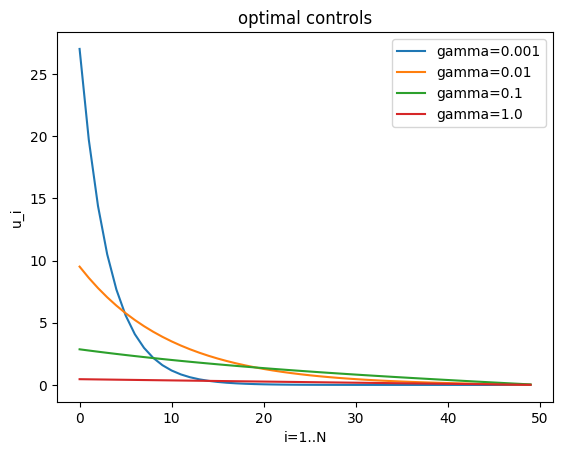

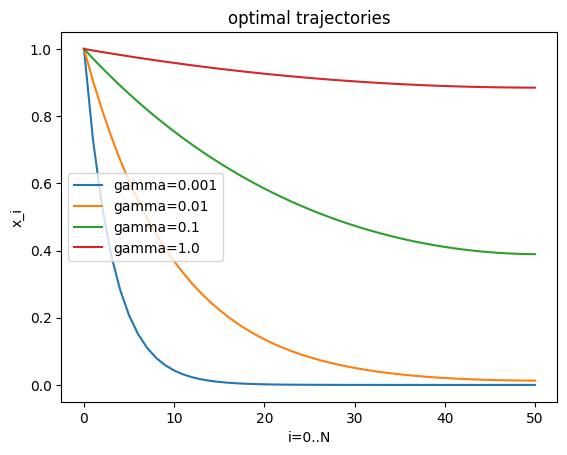

In [4]:
def S_matrix(a, b, N):
    S = np.zeros((N+1, N))
    for i in range(1, N+1):
        for k in range(1, i+1):
            S[i, k-1] = (a**(i-k)) * b
    return S

def vec_a(a, N):
    return np.array([a**i for i in range(N+1)])  # multiplies xbar outside

def solve_u_star(a, b, N, xbar, gamma):
    S = S_matrix(a, b, N)
    r = vec_a(a, N)
    lhs = S.T @ S + gamma * np.eye(N)
    rhs = - S.T @ r * xbar
    u = np.linalg.inv(lhs) @ rhs
    x = xbar * r + S @ u
    return u, x

N, a, b, xbar = 50, 1.0, -0.01, 1.0
gammas = [1e-3, 1e-2, 1e-1, 1.0]
U, X = [], []
for g in gammas:
    u, x = solve_u_star(a, b, N, xbar, g)
    U.append(u)
    X.append(x)

plt.figure()
[plt.plot(u, label=f'gamma={g}') for g,u in zip(gammas,U)]
plt.xlabel('i=1..N')
plt.ylabel('u_i')
plt.legend()
plt.title('optimal controls')
plt.show()

plt.figure()
[plt.plot(x, label=f'gamma={g}') for g,x in zip(gammas,X)]
plt.xlabel('i=0..N')
plt.ylabel('x_i')
plt.legend()
plt.title('optimal trajectories')
plt.show()

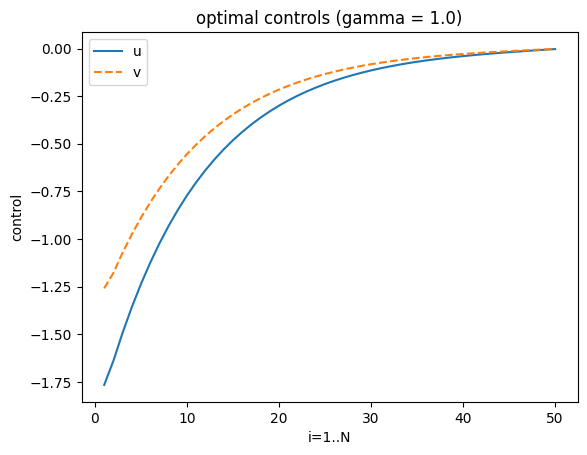

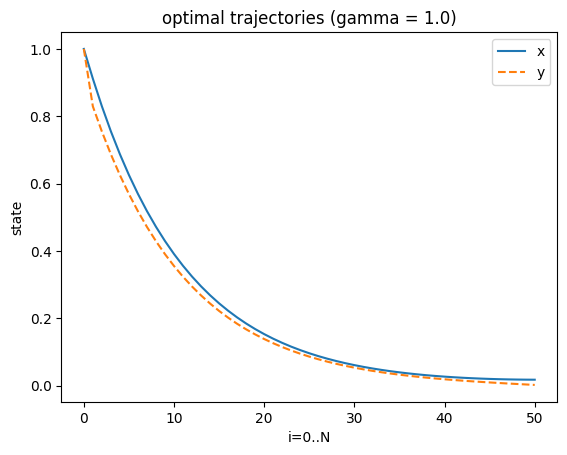

In [5]:
def solve_uv_star(a, b, N, xbar, c, d, ybar, gamma):
    Sx = S_matrix(a, b, N)
    Sy = S_matrix(c, d, N)
    rx = vec_a(a, N)
    ry = vec_a(c, N)

    I = np.eye(N)

    H11 = Sx.T @ Sx + gamma * I
    H22 = Sy.T @ Sy + gamma * I
    H12 = -gamma * I
    H = np.block([[H11, H12],
                  [H12, H22]])

    rhs = -np.concatenate([xbar * (Sx.T @ rx),
                           ybar * (Sy.T @ ry)])

    z = np.linalg.inv(H) @ rhs
    u = z[:N]
    v = z[N:]

    x = xbar * rx + Sx @ u
    y = ybar * ry + Sy @ v
    return u, v, x, y


N, a, b, xbar = 50, 1.0, 0.05, 1.0
c, d, ybar    = 0.2, -0.5, 1.0
gamma = 1.0

u, v, x, y = solve_uv_star(a, b, N, xbar, c, d, ybar, gamma)

# controls: plot u and v (single gamma)
plt.figure()
plt.plot(np.arange(1, N+1), u, label='u')
plt.plot(np.arange(1, N+1), v, '--', label='v')
plt.xlabel('i=1..N')
plt.ylabel('control')
plt.legend()
plt.title(f'optimal controls (gamma = {gamma})')
plt.show()

# trajectories: plot x and y (single gamma)
plt.figure()
plt.plot(np.arange(0, N+1), x, label='x')
plt.plot(np.arange(0, N+1), y, '--', label='y')
plt.xlabel('i=0..N')
plt.ylabel('state')
plt.legend()
plt.title(f'optimal trajectories (gamma = {gamma})')
plt.show()

In [13]:
gammas = 10 ** (np.arange(-50, 51) / 10)

def j_1(gamma):
    N, a, b, xbar = 50, 1.0, 0.05, 1.0
    c, d, ybar    = 0.2, -0.5, 1.0
    u, v, x, y = solve_uv_star(a, b, N, xbar, c, d, ybar, gamma)
    return np.linalg.norm(x)**2 + np.linalg.norm(y)**2

def j_2(gamma):
    N, a, b, xbar = 50, 1.0, 0.05, 1.0
    c, d, ybar    = 0.2, -0.5, 1.0
    u, v, x, y = solve_uv_star(a, b, N, xbar, c, d, ybar, gamma)
    return np.linalg.norm(u - v)**2

j1 = []
j2 = []
for gamma in gammas:
    j1.append(j_1(gamma))
    j2.append(j_2(gamma))

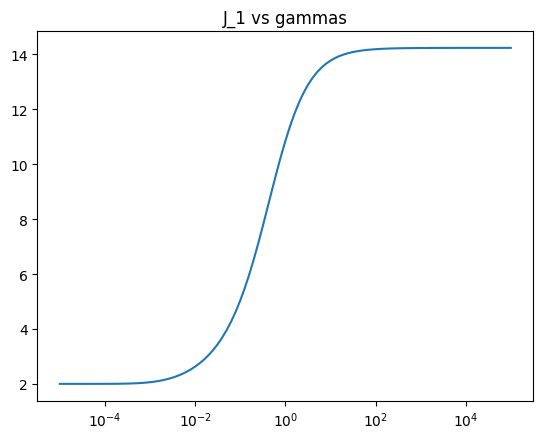

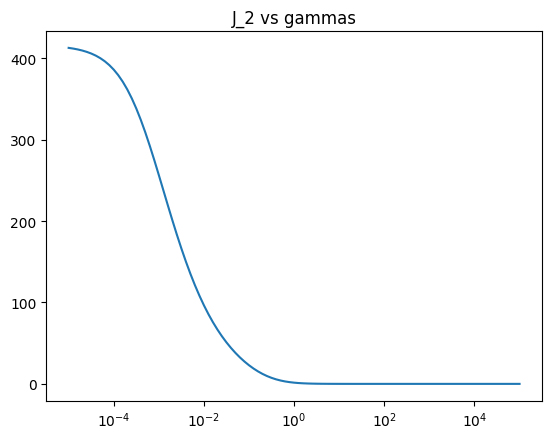

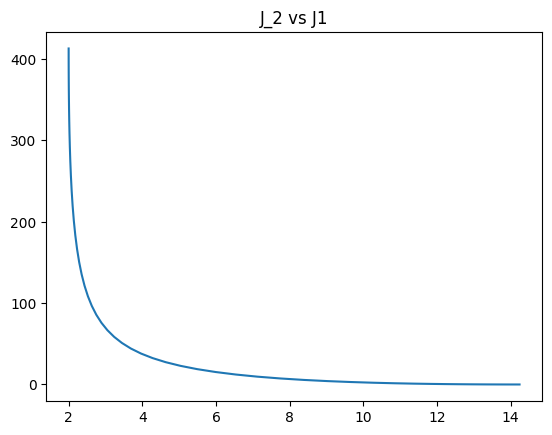

In [21]:
plt.figure()
plt.xscale("log")
plt.plot(gammas, j1)
plt.title("J_1 vs gammas")
plt.show()

plt.figure()
plt.xscale("log")
plt.plot(gammas, j2)
plt.title("J_2 vs gammas")
plt.show()

plt.figure()
# plt.xscale("log")
plt.plot(j1, j2)
plt.title("J_2 vs J1")
plt.show()